## import librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from scipy.stats import chi2_contingency

# Définir la palette de couleurs Set2 pour les graphiques
color_palette = px.colors.qualitative.Set2

## import speed dating data & basic stat 

In [3]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding = "latin-1" , sep="," , header=0)
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [4]:
df.describe(include='all')


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [5]:
df.shape

(8378, 195)

In [6]:
nbre_pop=len(df['iid'].unique())
print(f"le nombre de participants inscrits est de :{nbre_pop}")

print(f"le nombre de lignes du dataframe est de :{df.shape[0]}")
df.head()

le nombre de participants inscrits est de :551
le nombre de lignes du dataframe est de :8378


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df["attrib_mode"] = [2 if 5 < wave < 10 else 1 for wave in df["wave"]]
df.insert(6, "attrib_mode", df.pop("attrib_mode"))

display(df.head())

,iid,id,gender,idg,condtn,wave,attrib_mode,round,position,positin1,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [8]:

mappings = {
    "race": {1: "Black/African American", 2: "European/Caucasian-American", 3: "Latino/Hispanic American", 
             4: "Asian/Pacific Islander/Asian-American", 5: "Native American", 6: "Other"},
    "goal": {1: "Seemed like a fun night out", 2: "To meet new people", 3: "To get a date", 
             4: "Looking for a serious relationship", 5: "To say I did it", 6: "Other"},
    "date": {1: "Several times a week", 2: "Twice a week", 3: "Once a week", 4: "Twice a month", 
             5: "Once a month", 6: "Several times a year", 7: "Almost never"},
    "go_out": {1: "Several times a week", 2: "Twice a week", 3: "Once a week", 4: "Twice a month", 
               5: "Once a month", 6: "Several times a year", 7: "Almost never"},
    "career_c": {1: "Lawyer", 2: "Academic/Research", 3: "Psychologist", 4: "Doctor/Medicine", 
                 5: "Engineer", 6: "Creative Arts/Entertainment", 
                 7: "Finance/Marketing/Business/CEO/Entrepreneur/Admin", 
                 8: "Real Estate", 9: "International/Humanitarian Affairs", 
                 10: "Undecided", 11: "Social Work", 12: "Speech Pathology", 
                 13: "Politics", 14: "Pro sports/Athletics", 15: "Other", 
                 16: "Journalism", 17: "Architecture"},
    "gender": {0: "Female", 1: "Male"},
    "condtn": {1: "limited choice", 2: "extensive choice"},
    "match": {0: "No", 1: "Yes"},
    "samerace": {0: "No", 1: "Yes"},
    "dec": {0: "No", 1: "Yes"},
    "met": {1: "Yes", 2: "No"}
}


df_map = df.apply(lambda col: col.replace(mappings[col.name]) if col.name in mappings else col,axis=0)
df_map



,iid,id,gender,idg,condtn,wave,attrib_mode,round,position,positin1,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,limited choice,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,limited choice,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,limited choice,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Female,1,limited choice,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,Female,1,limited choice,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,Male,44,extensive choice,21,1,22,14,10.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,Male,44,extensive choice,21,1,22,13,10.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,Male,44,extensive choice,21,1,22,19,10.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,Male,44,extensive choice,21,1,22,3,10.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


# dataset Explore 

In [9]:
def clean_miss_values(df, seuil=0.7, colonnes_importantes=[]):
    """
    Supprime les colonnes dont le pourcentage de valeurs manquantes dépasse un seuil,
    sauf celles spécifiées comme importantes.

    Paramètres :
    - df : DataFrame à nettoyer
    - seuil : float entre 0 et 1, seuil de tolérance (par défaut : 0.7 = 70%)
    - colonnes_importantes : liste de colonnes à ne jamais supprimer même si elles dépassent le seuil

    Retourne :
    - df_clean : DataFrame sans les colonnes trop incomplètes
    - colonnes_supprimées : liste des colonnes supprimées
    """
    na_ratio = df.isnull().mean()
    colonnes_supprimées = na_ratio[na_ratio > seuil].index
    colonnes_supprimées = [col for col in colonnes_supprimées if col not in colonnes_importantes]
    
    df_clean = df.drop(columns=colonnes_supprimées)
    
    return df_clean, colonnes_supprimées


# 1- etude demographique

### personal data columns selection


In [10]:
#selection des ligne avec id unique
participants = df_map.drop_duplicates(subset='iid', keep='first')



pers_data = [
    'iid', 'gender', 'age', 'field', 'field_cd', 'undergra',
    'mn_sat', 'tuition', 'race', 'imprace', 'imprelig',
    'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
    'career', 'career_c', 'sports', 'tvsports', 'exercise',
    'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
    'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
    'shopping', 'yoga', 'exphappy', 'expnum'
]

# Filtrage du DataFrame
participants = df_map[pers_data]
participants.shape


(8378, 38)

In [11]:
colonnes_importantes = [
    'iid', 'gender', 'age', 'race', 'from', 'goal', 'date', 
    'go_out', 'career_c', 'income'
]

# Nettoyage
participants_clean, colonnes_supprimées = clean_miss_values(participants, seuil=0.3, colonnes_importantes=colonnes_importantes)

# Affichage
print("Colonnes supprimées :", colonnes_supprimées)
print("shape :", participants_clean.shape)

participants_clean.head()

Colonnes supprimées : ['undergra', 'mn_sat', 'tuition', 'expnum']
shape : (8378, 34)


,iid,gender,age,field,field_cd,race,imprace,imprelig,from,zipcode,...,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
0,1,Female,21.0,Law,1.0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521",...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
1,1,Female,21.0,Law,1.0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521",...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
2,1,Female,21.0,Law,1.0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521",...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
3,1,Female,21.0,Law,1.0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521",...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
4,1,Female,21.0,Law,1.0,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521",...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0


In [12]:
# -- Histogramme des âges par genre --
hist_female = go.Histogram(
    x=participants_clean[participants_clean['gender'] == 'Female']['age'],
    name='Female',
    marker_color=color_palette[0],
    nbinsx=40,
    opacity=0.75
)

hist_male = go.Histogram(
    x=participants_clean[participants_clean['gender'] == 'Male']['age'],
    name='Male',
    marker_color=color_palette[1],
    nbinsx=40,
    opacity=0.75
)

# -- Pie chart pour le genre --
pie_fig = px.pie(
    participants_clean,
    names='gender',
    title='Répartition par sexe',
    color='gender',
    hole=0.5,
    color_discrete_sequence=color_palette
)

# -- Subplots combinés --
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribution de l'âge par genre", "Répartition par sexe"),
    column_widths=[0.7, 0.3],
    specs=[[{'type': 'xy'}, {'type': 'domain'}]]
)

# Ajout des traces
fig.add_trace(hist_female, row=1, col=1)
fig.add_trace(hist_male, row=1, col=1)
fig.add_trace(pie_fig.data[0], row=1, col=2)

# -- Statistiques d'âge (annotation) --
age_series = participants_clean['age'].dropna()
stats_text = (
    f"age<br>"
    f"  Moyenne: {age_series.mean():.2f}<br>"
    f"  Médiane: {age_series.median():.2f}<br>"
    f"  Écart-type: {age_series.std():.2f}<br><br>"
)

fig.add_annotation(
    x=0.5, y=0.8,
    text=stats_text,
    showarrow=False,
    font=dict(size=14, color="black"),
    align="center",
    bgcolor="rgba(255, 255, 255, 0)",
    borderpad=4,
    opacity=0.8,
    xref="paper", yref="paper"
)

# -- Layout final --
fig.update_layout(
    title_text="<b>Répartition des participants</b>",
    height=600,
    width=1000,
    barmode='stack',
    xaxis_title='Âge',
    yaxis_title="Nombre d'individus",
    showlegend=True)

fig.show()


repartion des metiers

In [13]:
# Filtrage des participants uniques (1 ligne par iid)
participants = df_map.drop_duplicates(subset='iid')

# Vérification : 851 participants
print("Nombre de participants uniques :", participants.shape[0])

# Comptage du nombre de participants par race
race_counts = participants['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']

# Couleurs personnalisées (à adapter si besoin)
color_palette = px.colors.qualitative.Pastel

# Création du graphique
fig = px.bar(
    race_counts,
    y='race',
    x='count',
    title='<b>Répartition par communauté (851 participants)</b>',
    color='race',
    orientation='h',
    color_discrete_sequence=color_palette
)

fig.update_layout(
    xaxis_title='Nombre de participants',
    yaxis_title='Communauté',
    yaxis={'categoryorder': 'total ascending'},  # tri croissant
    showlegend=False  # légende inutile ici
)

fig.show()





Nombre de participants uniques : 551


repartion par metier et genre 

In [14]:
fig = px.histogram(participants, 
                   y='career_c',  # Variable pour les types de carrière (sur l'axe Y)
                   color='gender',  # Scinder les barres selon le sexe
                   title="<b>Répartition des metiers par sexe",
                   color_discrete_sequence=color_palette,  # Choisir une palette de couleurs
                   barmode='group',  # Les barres seront côte à côte pour chaque catégorie de carrière
                   height=600)  # Hauteur du graphique


fig.update_layout(
    xaxis_title="Nombre d'individus",
    yaxis_title="metiers",
    yaxis={'categoryorder': 'total ascending'},
    showlegend=True)

fig.show()


pourquoi font ils cette experience?


In [15]:
# Nettoyage : supprimer les NaN
df_goal = df_map.dropna(subset=['goal', 'gender'])

# Groupement
df_goal_by_gender = df_goal.groupby(['gender', 'goal']).size().reset_index(name='count')

# Graphique
fig = px.bar(df_goal_by_gender,
             x='goal',
             y='count',
             color='gender',
             barmode='group',
             title="🎯 Objectifs des participants selon le genre",
             labels={'goal': 'Objectif', 'count': 'Nombre de participants'},
             color_discrete_sequence=color_palette)

fig.update_layout(
    xaxis_tickangle=45,
    xaxis_title="Objectif",
    yaxis_title="Nombre de participants"
)

fig.show()



quels sont les revenus par genre

In [16]:
# Nettoyage du champ revenu
participants_clean['income_clean'] = (
    participants_clean['income']
    .astype(str)
    .str.replace(',', '')
    .replace('nan', np.nan)
    .astype(float)
)



fig = px.box(
    participants_clean,
    x='gender',
    y='income_clean',
    color='gender',
    title="Répartition des revenus par genre",
    color_discrete_sequence=color_palette
)

fig.update_layout(
    yaxis_title="Revenu annuel ($)"
)

fig.show()



les centres d'interet des participants

In [17]:
interets = [col for col in participants_clean.columns if col in [
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
    'movies', 'concerts', 'music', 'shopping', 'yoga'
]]


# Moyennes par genre
female_means = participants_clean[participants_clean['gender'] == 'Female'][interets].mean()
male_means = participants_clean[participants_clean['gender'] == 'Male'][interets].mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=female_means,
    theta=interets,
    fill='toself',
    name='Female'
))
fig.add_trace(go.Scatterpolar(
    r=male_means,
    theta=interets,
    fill='toself',
    name='Male'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 10])
    ),
    title="<b>Profil des centres d’intérêt par genre</b>",
    showlegend=True,
    height=600
)

fig.show()




# 2-  "match" statistiques

combien y a t il eut de match ?

analyse des facteurs influencant la probabilité qu’un participant dise "oui" lors d’une session, et donc qu’un match ait lieu.

In [18]:
colonnes_match = [
    'match', 'gender', 'age', 'race', 'race_o', 'samerace','imprelig',
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
    'dec', 'dec_o',
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
    'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
    'income', 'career',
    'go_out', 'date'
]

# Créer un DataFrame avec ces colonnes uniquement
df_match_features = df_map[colonnes_match]

# Afficher un aperçu
df_match_features.head()


,match,gender,age,race,race_o,samerace,imprelig,attr_o,sinc_o,intel_o,...,amb1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,income,career,go_out,date
0,No,Female,21.0,Asian/Pacific Islander/Asian-American,2.0,No,4.0,6.0,8.0,8.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
1,No,Female,21.0,Asian/Pacific Islander/Asian-American,2.0,No,4.0,7.0,8.0,10.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
2,Yes,Female,21.0,Asian/Pacific Islander/Asian-American,4.0,Yes,4.0,10.0,10.0,10.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
3,Yes,Female,21.0,Asian/Pacific Islander/Asian-American,2.0,No,4.0,7.0,8.0,9.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
4,Yes,Female,21.0,Asian/Pacific Islander/Asian-American,3.0,No,4.0,8.0,7.0,9.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never


In [19]:
colonnes_importantes = [
    'match',          # Variable cible
    'gender', 'age',  # Variables démographiques
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',  # Ce que l'autre pense de moi
    'dec', 'dec_o',   # Décision personnelle et de l’autre
    'samerace', 'race', 'race_o','imprelig',  # Données sur les origines
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',  # Préférences déclarées
    'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',  # Préférences réelles après expérience
    'income', 'career'        # Revenus et metiers
    'go_out', 'date'  # Style de vie
]


df_match_features_clean, colonnes_supprimees = clean_miss_values(df_map[colonnes_match], seuil=0.3, colonnes_importantes=colonnes_importantes)

print("Colonnes supprimées :", colonnes_supprimees)
df_match_features_clean.head()


Colonnes supprimées : []


,match,gender,age,race,race_o,samerace,imprelig,attr_o,sinc_o,intel_o,...,amb1_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,income,career,go_out,date
0,No,Female,21.0,Asian/Pacific Islander/Asian-American,2.0,No,4.0,6.0,8.0,8.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
1,No,Female,21.0,Asian/Pacific Islander/Asian-American,2.0,No,4.0,7.0,8.0,10.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
2,Yes,Female,21.0,Asian/Pacific Islander/Asian-American,4.0,Yes,4.0,10.0,10.0,10.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
3,Yes,Female,21.0,Asian/Pacific Islander/Asian-American,2.0,No,4.0,7.0,8.0,9.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never
4,Yes,Female,21.0,Asian/Pacific Islander/Asian-American,3.0,No,4.0,8.0,7.0,9.0,...,15.0,6.0,8.0,8.0,8.0,7.0,"69,487.00",lawyer,Several times a week,Almost never


matching analysis

In [20]:
# Compter les matchs (1 = réciproques)
match_counts = df_match_features_clean['match'].value_counts(normalize=True) * 100

# Arrondi pour lisibilité
match_counts = match_counts.round(1)
print(match_counts)



match
No     83.5
Yes    16.5
Name: proportion, dtype: float64


In [21]:
# Comptage des matchs
match_counts = df_match_features_clean['match'].value_counts().reset_index()
match_counts.columns = ['match', 'count']

# Total
total_matchs = match_counts['count'].sum()

# Création du donut
fig = px.pie(
    match_counts,
    names='match',
    values='count',
    title=f'💘 Répartition des matchs (Total : {total_matchs})',
    hole=0.5,
    color_discrete_sequence=color_palette
)

# Texte au centre et dans les tranches
fig.update_traces(textposition='inside', textinfo='percent+label')

# Afficher la légende avec les effectifs
fig.update_layout(
    legend_title_text='Statut du match',
    legend=dict(
        itemsizing='constant',
        font=dict(size=12),
        traceorder="normal"
    )
)

fig.show()





🧑‍🤝‍🧑 2. L'appartenance à la même race joue-t-elle un rôle dans le match ?
🎯 Objectif :
Tester si le fait que les deux participants soient de la même origine ethnique (samerace) influence la probabilité d’avoir un match.

In [22]:
# Nettoyage explicite des colonnes
df_temp = df_match_features_clean.copy()
df_temp['match'] = df_temp['match'].map({'Yes': 'Yes', 'No': 'No'})
df_temp['samerace'] = df_temp['samerace'].map({'Yes': 'Yes', 'No': 'No'})

# Filtrer uniquement les lignes valides
df_temp = df_temp[df_temp['match'].isin(['Yes', 'No']) & df_temp['samerace'].isin(['Yes', 'No'])]

# Créer la matrice de confusion
conf_matrix = pd.crosstab(df_temp['match'], df_temp['samerace'])

# Test khi²
chi2, p_value, dof, expected = chi2_contingency(conf_matrix)

# Texte d'annotation
annotation_text = (
    "<b>H₀ :</b> L'origine ethnique n'influence pas la probabilité de match.<br>"
    f"<b>Statistique χ² :</b> {chi2:.2f} &nbsp;&nbsp;&nbsp; <b>p-value :</b> {p_value:.4f}"
)

# Affichage graphique
fig = px.imshow(
    conf_matrix,
    text_auto=True,
    color_continuous_scale='Purples',
    labels=dict(x="origine commune", y="Match", color="Nombre de cas"),
    title="📊 Matrice de confusion : Match vs Origine ethnique commune",
  # marges ajustées pour inclure l'annotation
)


# Ajout du texte de l'hypothèse
fig.add_annotation(
    text=annotation_text,
    xref="paper", yref="paper",
    x=0.5, y=1.15,
    showarrow=False,
    align="center",
    font=dict(size=12),
    bordercolor="black",
    borderwidth=1,
    bgcolor="lightyellow"
)

fig.update_layout(
    width=700,
    height=500,
    margin=dict(l=100, r=100, t=150, b=50))

fig.show()


le match est il influencer par les religion ?

In [23]:
# Exemple : binarisation de l'importance religieuse
df_match_features_clean['religious'] = df_match_features_clean['imprelig'].apply(lambda x: 'Oui' if x >= 7 else 'Non')

# Matrice de confusion
conf_matrix = pd.crosstab(df_match_features_clean['match'], df_match_features_clean['religious'])

# Test du khi²
chi2, p_value, dof, expected = chi2_contingency(conf_matrix)

# Annotation H₀
annotation_text = (
    "<b>H₀ :</b> La religion n'influence pas la probabilité de match.<br>"
    f"<b>Statistique χ² :</b> {chi2:.2f} &nbsp;&nbsp;&nbsp; <b>p-value :</b> {p_value:.4f}"
)

# Création de la heatmap
fig = go.Figure(data=go.Heatmap(
    z=conf_matrix.values,
    x=conf_matrix.columns,
    y=conf_matrix.index,
    colorscale="Purples",
    showscale=True,
    hovertemplate='Match: %{y}<br>Importance religieuse: %{x}<br>Nombre: %{z}<extra></extra>'
))

# Ajout des valeurs dans les cases
for i, y_val in enumerate(conf_matrix.index):
    for j, x_val in enumerate(conf_matrix.columns):
        fig.add_annotation(
            x=x_val,
            y=y_val,
            text=str(conf_matrix.values[i][j]),
            showarrow=False,
            font=dict(color="black", size=14)
        )

# Ajout du texte de l'hypothèse
fig.add_annotation(
    text=annotation_text,
    xref="paper", yref="paper",
    x=0.5, y=1.15,
    showarrow=False,
    align="center",
    font=dict(size=12),
    bordercolor="black",
    borderwidth=1,
    bgcolor="lightyellow"
)

# Mise en forme
fig.update_layout(
    title="🧱 Matrice de confusion : Match vs Importance de la religion",
    xaxis_title="Importance religieuse",
    yaxis_title="Match",
    width=700,
    height=500,
    margin=dict(l=100, r=100, t=150, b=50))


fig.show()





le match est il influencer par les revenus

In [24]:
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import ttest_ind

# Nettoyage de la colonne income
df_map['income'] = df_map['income'].astype(str).str.replace(',', '', regex=False)
df_map['income'] = pd.to_numeric(df_map['income'], errors='coerce')

# Binarisation du match
df_map['match_bin'] = df_map['match'].map({'Yes': 1, 'No': 0})

# Sélection des données valides
df_test = df_map[['income', 'match_bin']].dropna()

# Extraction des groupes
revenus_match = df_test[df_test['match_bin'] == 1]['income']
revenus_nomatch = df_test[df_test['match_bin'] == 0]['income']

# Test de Student (t-test)
t_stat, p_val = ttest_ind(revenus_match, revenus_nomatch, equal_var=False)

# --- Boxplots ---
fig = go.Figure()

fig.add_trace(go.Box(
    y=revenus_match,
    name='Match = Oui',
    boxpoints='outliers',
    marker_color='green'
))

fig.add_trace(go.Box(
    y=revenus_nomatch,
    name='Match = Non',
    boxpoints='outliers',
    marker_color='red'
))

# --- Annotation H₀ ---
annotation_text = (
    "<b>H₀ :</b> Le revenu n’influence pas la probabilité de match<br>"
    f"<b>t-statistique :</b> {t_stat:.2f} &nbsp;&nbsp;&nbsp; <b>p-value :</b> {p_val:.4f}"
)

fig.add_annotation(
    text=annotation_text,
    xref="paper", yref="paper",
    x=0.5, y=1.15,
    showarrow=False,
    align="center",
    font=dict(size=12),
    bordercolor="black",
    borderwidth=1,
    bgcolor="lightyellow"
)

# Mise en forme
fig.update_layout(
    title="💸 Boxplots du revenu selon qu’il y ait eu match ou non",
    yaxis_title="Revenu ($)",
    width=700,
    height=500,
    margin=dict(t=120)
)

fig.show()








l'impact du metier de l'autre sur les match

In [25]:
# Filtrer les lignes valides
df_metiers = df_match_features_clean[
    (df_match_features_clean['match'] == 'Yes') &
    (df_match_features_clean['career'].notna()) &
    (df_match_features_clean['career'].str.strip() != '')
]

# Aperçu des données valides
print(f"Lignes avec match et carrière renseignée : {len(df_metiers)}")
print(df_metiers[['career', 'gender']].head())



Lignes avec match et carrière renseignée : 1364
    career  gender
2   lawyer  Female
3   lawyer  Female
4   lawyer  Female
8   lawyer  Female
13     law  Female


In [26]:
import plotly.express as px

# Étape 1 : Nettoyage des noms de métiers (ex. : "lawyer" vs "law")
df_metiers['career_clean'] = df_metiers['career'].str.lower().str.strip()

# Étape 2 : Top 10 métiers ayant obtenu le plus de "match" par genre
top_careers = (
    df_metiers
    .groupby(['gender', 'career_clean'])
    .size()
    .reset_index(name='count')
    .sort_values(['gender', 'count'], ascending=[True, False])
    .groupby('gender')
    .head(10)
)

# Étape 3 : Visualisation avec 2 bar charts côte à côte
fig = px.bar(
    top_careers,
    x='count',
    y='career_clean',
    color='gender',
    facet_col='gender',
    orientation='h',
    title="💼 Métiers les plus attractifs (nombre de matchs) par genre",
    labels={'career_clean': 'Métier', 'count': 'Nombre de matchs'}
)

# Mise en forme
fig.update_layout(
    height=600,
    showlegend=False
)
fig.update_yaxes(categoryorder='total ascending')

fig.show()



C:\Users\licor\AppData\Local\Temp\ipykernel_40044\3199234842.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 3- la perception de soi et du partenaire 

In [27]:
# Colonnes à conserver
cols_interest = [
    'gender', 'attrib_mode',
    'attr', 'sinc', 'intel', 'fun', 'amb',               # auto-évaluation
    'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',    # perçu par l'autre
    'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s',
    'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s',     
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', # importance déclarée
    'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'  # importance réelle
]

# Création des DataFrames selon le mode
df_percept_mode1 = df_map[df_map["attrib_mode"] == 1][cols_interest].copy()
df_percept_mode2 = df_map[df_map["attrib_mode"] == 2][cols_interest].copy()


# Colonnes à utiliser par mode
traits_mode1 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1']
traits_mode2 = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']

# Moyennes par genre
df_radar1 = df_percept_mode1.groupby('gender')[traits_mode1].mean().reset_index().melt(id_vars='gender', var_name='trait', value_name='score')
df_radar2 = df_percept_mode2.groupby('gender')[traits_mode2].mean().reset_index().melt(id_vars='gender', var_name='trait', value_name='score')

# Nettoyage des noms de traits pour harmoniser l'affichage
df_radar1['trait'] = df_radar1['trait'].str.replace('1_1', '')
df_radar2['trait'] = df_radar2['trait'].str.replace('3_1', '')





perception de lautre apres le date 

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# --- Traits à inclure ---
traits = ['attr', 'sinc', 'intel', 'fun', 'amb']
labels = [t.capitalize() for t in traits]

# --- Filtrage par genre ---
df_female = df_map[df_map['gender'] == 'Female']
df_male = df_map[df_map['gender'] == 'Male']

# --- Moyennes par genre ---
moy_female = df_female[traits].mean()
moy_male = df_male[traits].mean()

# --- Création des subplots ---
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'polar'}, {'type': 'polar'}]],
    subplot_titles=[
        "🧍‍♀️ Perception de soi – Femmes",
        "🧍‍♂️ Perception de soi – Hommes"
    ]
)

# --- Graphe Femmes ---
fig.add_trace(go.Scatterpolar(
    r=moy_female.values,
    theta=labels,
    fill='toself',
    name='Femmes',
    line=dict(color='royalblue'),
    opacity=0.7
), row=1, col=1)

# --- Graphe Hommes ---
fig.add_trace(go.Scatterpolar(
    r=moy_male.values,
    theta=labels,
    fill='toself',
    name='Hommes',
    line=dict(color='crimson'),
    opacity=0.7
), row=1, col=2)

# --- Mise en page ---
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[1, 10])),
    polar2=dict(radialaxis=dict(visible=True, range=[1, 10])),
    showlegend=False,
    title="🎯 Perception de soi – Femmes vs Hommes",
    title_x=0.5,
    width=1200,
    height=600
)

fig.show()



ce que recherche le sexe opposé


In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# --- Paramètres ---
traits = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
labels = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']
color_map = {"Perception": "crimson", "Réel": "royalblue"}

# --- Colonnes à utiliser ---
traits_real = [t + '1_1' for t in traits]      # Ce que les gens recherchent réellement
traits_perceived = [t + '2_1' for t in traits] # Ce que les gens pensent que l'autre recherche

# --- Nettoyage : vérification des colonnes existantes ---
for col in traits_real + traits_perceived:
    if col not in df_map.columns:
        print(f"⚠️ Colonne manquante : {col}")

# --- Extraction des données ---
# Femmes : ce qu'elles veulent réellement vs ce que les hommes pensent qu'elles veulent
fem_reel = df_map[df_map['gender'] == 'Female'][traits_real].mean(skipna=True).values
fem_percu = df_map[df_map['gender'] == 'Male'][traits_perceived].mean(skipna=True).values

# Hommes : ce qu'ils veulent réellement vs ce que les femmes pensent qu'ils veulent
hom_reel = df_map[df_map['gender'] == 'Male'][traits_real].mean(skipna=True).values
hom_percu = df_map[df_map['gender'] == 'Female'][traits_perceived].mean(skipna=True).values

# --- Échelle automatique ---
min_v = max(0, min(fem_reel.min(), fem_percu.min(), hom_reel.min(), hom_percu.min()) - 5)
max_v = min(100, max(fem_reel.max(), fem_percu.max(), hom_reel.max(), hom_percu.max()) + 5)

# --- Radar charts ---
fig_mode2 = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'polar'}, {'type': 'polar'}]],
)

# ➤ Ce que les femmes veulent vs ce que les hommes pensent qu'elles veulent
fig_mode2.add_trace(go.Scatterpolar(
    r=fem_percu, theta=labels, fill='toself',
    name="Graph1-Perception masculine", line_color=color_map["Perception"]
), row=1, col=1)
fig_mode2.add_trace(go.Scatterpolar(
    r=fem_reel, theta=labels, fill='toself',
    name="Graph1-Préférences réelles (femmes)", line_color=color_map["Réel"]
), row=1, col=1)

# ➤ Ce que les hommes veulent vs ce que les femmes pensent qu'ils veulent
fig_mode2.add_trace(go.Scatterpolar(
    r=hom_percu, theta=labels, fill='toself',
    name="Graph2-Perception féminine", line_color=color_map["Perception"]
), row=1, col=2)
fig_mode2.add_trace(go.Scatterpolar(
    r=hom_reel, theta=labels, fill='toself',
    name="Graph2-Préférences réelles (hommes)", line_color=color_map["Réel"]
), row=1, col=2)

# --- Mise en page ---
fig_mode2.update_layout(
    title="🔍 Perception vs Réalité ( Préférences )",
    title_x=0.5,
    polar=dict(radialaxis=dict(visible=True, range=[min_v, max_v])),
    polar2=dict(radialaxis=dict(visible=True, range=[min_v, max_v])),
    annotations=[
        dict(text="👩 Ce que recherchent les femmes (vs ce que pensent les hommes)", x=0, y=1.1, showarrow=False, font=dict(size=14)),
        dict(text="👨 Ce que recherchent les hommes (vs ce que pensent les femmes)", x=1, y=1.1, showarrow=False, font=dict(size=14))
    ],
    showlegend=True,
    width=1500,
    height=600
)

fig_mode2.show()


# Evolution pendant les "DATE"

evolution des criteres de choix 

In [30]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Liste des traits
traits = ['attr', 'sinc', 'intel', 'fun', 'amb']

# Colonnes nécessaires
cols_pref = (
    ['gender'] +
    [t + '1_1' for t in traits] +  # début
    [t + '1_s' for t in traits] +  # milieu
    [t + '3_1' for t in traits]    # fin
)

# Filtrage sur le mode 1 (répartition 100 points)
df_pref = df_map[df_map['attrib_mode'] == 1][cols_pref].copy()

# Construction du DataFrame d’évolution
data_evolution = []

for gender in df_pref['gender'].unique():
    df_genre = df_pref[df_pref['gender'] == gender]
    for trait in traits:
        data_evolution += [
            {'gender': gender, 'trait': trait, 'moment': 'Début',  'score': df_genre[trait + '1_1'].mean()},
            {'gender': gender, 'trait': trait, 'moment': 'Milieu', 'score': df_genre[trait + '1_s'].mean()},
            {'gender': gender, 'trait': trait, 'moment': 'Fin',    'score': df_genre[trait + '3_1'].mean()}
        ]

df_evolution = pd.DataFrame(data_evolution)

# Couleurs par trait
colors = {
    'attr': 'gold',
    'sinc': 'cornflowerblue',
    'intel': 'mediumseagreen',
    'fun': 'tomato',
    'amb': 'orchid'
}

# Création d'une figure à deux colonnes (un subplot par genre)
fig = make_subplots(rows=1, cols=2, subplot_titles=("Préférences – Femmes", "Préférences – Hommes"))

for i, gender in enumerate(['Female', 'Male']):
    df_genre = df_evolution[df_evolution['gender'] == gender]
    col = i + 1
    for trait in traits:
        df_trait = df_genre[df_genre['trait'] == trait]
        fig.add_trace(go.Scatter(
            x=df_trait['moment'],
            y=df_trait['score'],
            mode='lines+markers',
            name=trait.capitalize(),
            line=dict(color=colors[trait]),
            showlegend=(col == 1)  # évite doublons dans légende
        ), row=1, col=col)

    fig.update_yaxes(title_text="Score moyen (%)", range=[0, 35], row=1, col=col)
    fig.update_xaxes(title_text="Moment", row=1, col=col)

# Mise en forme globale
fig.update_layout(
    title_text="📊 Évolution des préférences (mode 1 - 100 points) par genre",
    template="plotly_white",
    legend_title_text="Critère",
    width=1000,
    height=500
)

fig.show()




# Evolution des match sur l'enquete

taux de match 

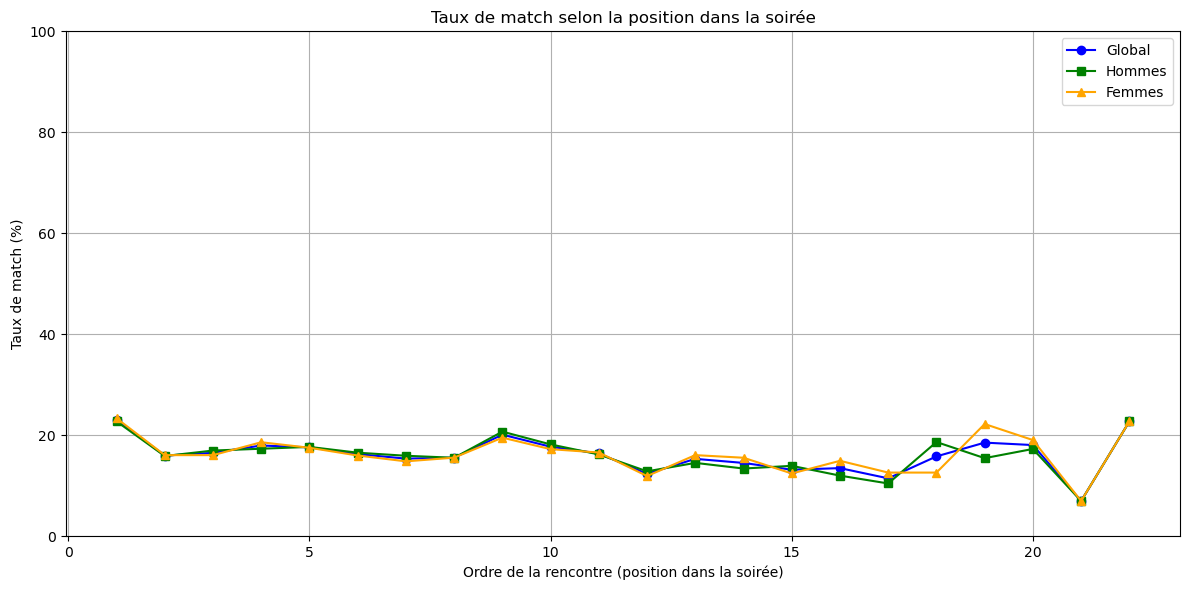

In [31]:

# Préparation des données
df_filtered = df_map[(df_map['dec'].isin(['Yes', 'No'])) & (df_map['match'].isin(['Yes', 'No']))].copy()
df_filtered['match_bin'] = df_filtered['match'].map({'Yes': 1, 'No': 0})

# Taux de match global par position
df_global = df_filtered.groupby('order').agg(
    n_total=('iid', 'count'),
    n_match=('match_bin', 'sum')
).reset_index()
df_global['taux_match'] = 100 * df_global['n_match'] / df_global['n_total']

# Taux de match chez les hommes
df_men = df_filtered[df_filtered['gender'] == 'Male'].groupby('order').agg(
    n_total=('iid', 'count'),
    n_match=('match_bin', 'sum')
).reset_index()
df_men['taux_match'] = 100 * df_men['n_match'] / df_men['n_total']

# Taux de match chez les femmes
df_women = df_filtered[df_filtered['gender'] == 'Female'].groupby('order').agg(
    n_total=('iid', 'count'),
    n_match=('match_bin', 'sum')
).reset_index()
df_women['taux_match'] = 100 * df_women['n_match'] / df_women['n_total']

# Tracé du graphique combiné
plt.figure(figsize=(12, 6))
plt.plot(df_global['order'], df_global['taux_match'], marker='o', color='blue', label="Global")
plt.plot(df_men['order'], df_men['taux_match'], marker='s', color='green', label="Hommes")
plt.plot(df_women['order'], df_women['taux_match'], marker='^', color='orange', label="Femmes")

plt.xlabel("Ordre de la rencontre (position dans la soirée)")
plt.ylabel("Taux de match (%)")
plt.title("Taux de match selon la position dans la soirée")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


taux de dec

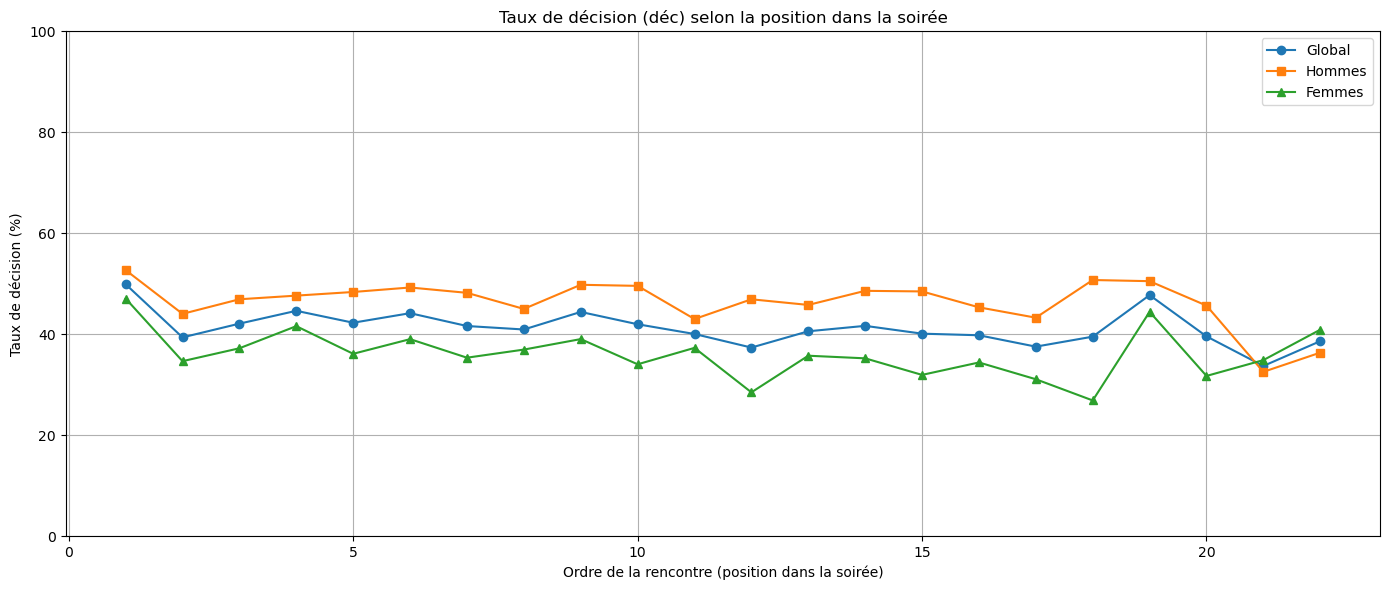

In [32]:
import matplotlib.pyplot as plt

# Recalcule du taux de décision (déc) global et par genre
df_dec = df_map[df_map['dec'].isin(["Yes", "No"]) & df_map['order'].notna()].copy()
df_dec['order'] = df_dec['order'].astype(int)

# Global
df_global_dec = df_dec.groupby('order').agg(
    n_total=('iid', 'count'),
    n_dec=('dec', lambda x: (x == "Yes").sum())
).reset_index()
df_global_dec['taux_dec'] = 100 * df_global_dec['n_dec'] / df_global_dec['n_total']

# Hommes
df_male_dec = df_dec[df_dec['gender'] == 'Male'].groupby('order').agg(
    n_total=('iid', 'count'),
    n_dec=('dec', lambda x: (x == "Yes").sum())
).reset_index()
df_male_dec['taux_dec'] = 100 * df_male_dec['n_dec'] / df_male_dec['n_total']

# Femmes
df_female_dec = df_dec[df_dec['gender'] == 'Female'].groupby('order').agg(
    n_total=('iid', 'count'),
    n_dec=('dec', lambda x: (x == "Yes").sum())
).reset_index()
df_female_dec['taux_dec'] = 100 * df_female_dec['n_dec'] / df_female_dec['n_total']

# Tracé des courbes
plt.figure(figsize=(14, 6))

plt.plot(df_global_dec['order'], df_global_dec['taux_dec'], marker='o', label='Global')
plt.plot(df_male_dec['order'], df_male_dec['taux_dec'], marker='s', label='Hommes')
plt.plot(df_female_dec['order'], df_female_dec['taux_dec'], marker='^', label='Femmes')

plt.xlabel("Ordre de la rencontre (position dans la soirée)")
plt.ylabel("Taux de décision (%)")
plt.title("Taux de décision (déc) selon la position dans la soirée")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# second DATE or not?

que sepasse t il apres un match

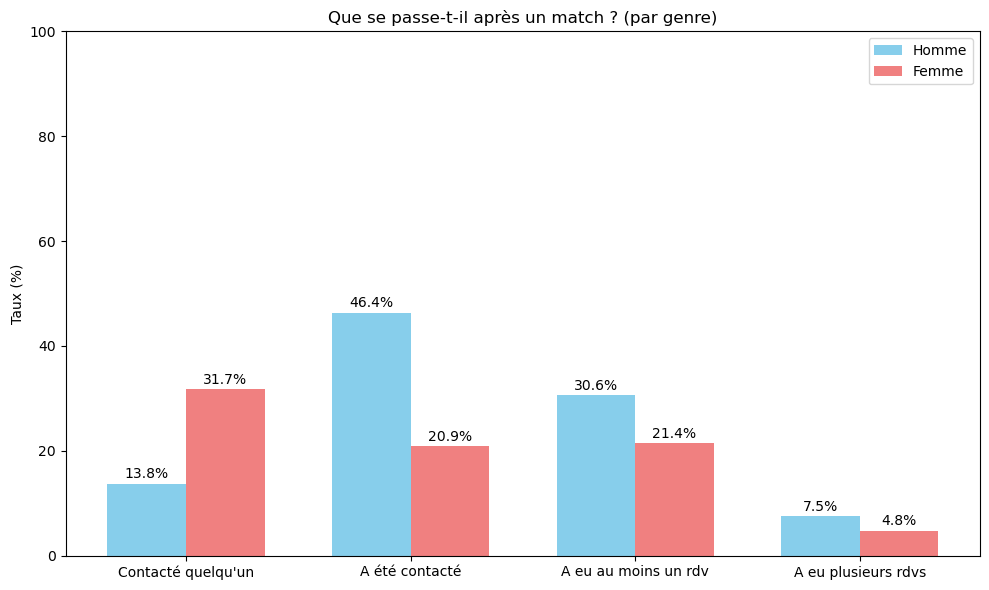

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("Speed_Dating_Data.csv", encoding="ISO-8859-1")

# Garder uniquement les lignes avec match
df_match = df[df['match'] == 1].copy()

# Remplacer les NaN par 0 pour les colonnes d'intérêt
for col in ['you_call', 'them_cal', 'date_3', 'numdat_3']:
    df_match[col] = df_match[col].fillna(0)

# Indicateurs binaires
df_match['a_contacte'] = df_match['you_call'] > 0
df_match['a_ete_contacte'] = df_match['them_cal'] > 0
df_match['a_eu_rdv'] = df_match['date_3'] == 1
df_match['plusieurs_rdvs'] = df_match['numdat_3'] > 1

# Liste des indicateurs à analyser
indicateurs = ['a_contacte', 'a_ete_contacte', 'a_eu_rdv', 'plusieurs_rdvs']
noms = [
    "Contacté quelqu'un", 
    "A été contacté", 
    "A eu au moins un rdv", 
    "A eu plusieurs rdvs"
]

# Calcul des moyennes par genre
df_genre = df_match.groupby('gender')[indicateurs].mean().T
df_genre.columns = ['Homme', 'Femme']
df_genre *= 100  # pourcentage
df_genre['Action'] = noms
df_genre = df_genre.reset_index(drop=True)

# Affichage
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_genre))

ax.bar([i - bar_width/2 for i in x], df_genre['Homme'], width=bar_width, label='Homme', color='skyblue')
ax.bar([i + bar_width/2 for i in x], df_genre['Femme'], width=bar_width, label='Femme', color='lightcoral')

# Ajout des annotations
for i in x:
    ax.text(i - bar_width/2, df_genre['Homme'][i] + 1, f"{df_genre['Homme'][i]:.1f}%", ha='center')
    ax.text(i + bar_width/2, df_genre['Femme'][i] + 1, f"{df_genre['Femme'][i]:.1f}%", ha='center')

ax.set_xticks(x)
ax.set_xticklabels(df_genre['Action'])
ax.set_ylabel("Taux (%)")
ax.set_title("Que se passe-t-il après un match ? (par genre)")
plt.ylim(0, 100)
ax.set_ylim(0, 100)
ax.legend()
plt.tight_layout()
plt.show()

